In [1]:
from typing import Callable
import numpy as np
import pandas as pd
from verma_net_radiation_sensitivity.verma_net_radiation_sensitivity import process_verma_net_radiation_table
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def repeat_rows(df: pd.DataFrame, n: int) -> pd.DataFrame:
    return pd.DataFrame(np.repeat(df.values, n, axis=0), columns=df.columns)

In [3]:
def perturbed_run(
        input_df: pd.DataFrame, 
        input_variable: str, 
        output_variable: str, 
        forward_process: Callable,
        n: int = 100, 
        perturbation_mean: float = 0,
        perturbation_std: float = None) -> pd.DataFrame:
    input_std = np.nanstd(input_df[input_variable])

    if perturbation_std is None:
        perturbation_std = input_std
    
    unperturbed_output_df = forward_process(input_df)
    unperturbed_output = unperturbed_output_df[output_variable]
    unperturbed_output = repeat_rows(unperturbed_output_df, n)[output_variable]
    input_perturbation = np.concatenate([np.random.normal(0, perturbation_std, n) for i in range(len(input_df))])
    perturbed_input_df = input_df.copy()
    perturbed_input_df = repeat_rows(perturbed_input_df, n)
    unperturbed_input = perturbed_input_df[input_variable]
    perturbed_input_df[input_variable] = perturbed_input_df[input_variable] + input_perturbation
    perturbed_input = perturbed_input_df[input_variable]
    perturbed_output_df = forward_process(perturbed_input_df)
    perturbed_output = perturbed_output_df[output_variable]
    output_perturbation = perturbed_output - unperturbed_output

    results_df = pd.DataFrame({
        f"{input_variable}_unperturbed": unperturbed_input,
        f"{input_variable}_perturbation": input_perturbation,
        f"{input_variable}_perturbed": perturbed_input,
        f"{output_variable}_unperturbed": unperturbed_output,
        f"{output_variable}_perturbation": output_perturbation,
        f"{output_variable}_perturbed": perturbed_output, 
    })

    return results_df

In [4]:
input_variable = "LST"
output_variable = "Rn"
n = 100
forward_process = process_verma_net_radiation_table

In [5]:
input_df = pd.read_csv("ha2_FLiES_outputs.csv")
input_df

,Unnamed: 0.1,Unnamed: 0,tower,lat,lon,time_UTC,date_UTC,time_solar,NDVI,NDVI-UQ,...,SZA,KG,Ra,UV,VIS,NIR,VISdiff,NIRdiff,VISdir,NIRdir
0,0,4,US-Ha2,42.5393,-72.1779,4/20/20 11:54,4/20/20,05:59.3,0.610612,0.005058,...,70.078213,4,449.406445,8.912768,64.678649,65.266361,38.855484,65.172654,25.823165,0.093707
1,1,7,US-Ha2,42.5393,-72.1779,4/29/20 14:28,4/29/20,39:24.3,0.620425,0.127409,...,41.171380,4,988.125315,46.184569,347.903366,390.302551,59.749265,76.399450,288.154101,313.903101
2,2,13,US-Ha2,42.5393,-72.1779,6/18/20 18:47,6/18/20,59:08.3,0.895675,0.009954,...,31.179360,4,1104.179114,51.634050,372.709763,394.764407,125.033561,290.748160,247.676201,104.016247
3,3,16,US-Ha2,42.5393,-72.1779,6/19/20 18:00,6/19/20,11:19.3,0.896485,0.014854,...,24.148018,4,1177.525513,56.207435,402.211413,428.370252,151.624257,334.541702,250.587156,93.828550
4,4,19,US-Ha2,42.5393,-72.1779,6/21/20 11:31,6/21/20,42:58.3,0.903945,0.024650,...,66.727354,4,509.758470,18.690810,157.488522,160.486746,47.879650,92.094426,109.608871,68.392320
5,5,22,US-Ha2,42.5393,-72.1779,6/22/20 17:13,6/22/20,24:27.3,0.899074,0.000100,...,19.749678,4,1214.177359,14.874881,88.764428,59.928929,81.070550,59.928929,7.693878,0.000000
6,6,25,US-Ha2,42.5393,-72.1779,6/23/20 16:25,6/23/20,36:26.3,0.902543,0.005047,...,19.712940,4,1214.358723,19.926547,120.550404,92.049981,110.066158,92.049981,10.484246,0.000000
7,7,28,US-Ha2,42.5393,-72.1779,7/4/20 12:28,7/4/20,40:06.3,0.585320,0.128635,...,56.632438,4,709.329409,29.380463,239.411545,256.567081,62.626541,34.096947,176.785004,222.470134
8,8,31,US-Ha2,42.5393,-72.1779,7/25/20 22:08,7/25/20,19:28.3,0.918178,0.127409,...,69.566442,4,451.569625,17.187152,147.124052,154.973287,38.430275,28.737323,108.693778,126.235964
9,9,34,US-Ha2,42.5393,-72.1779,7/29/20 20:33,7/29/20,44:37.3,0.918448,0.127579,...,52.731408,4,784.058223,6.840975,44.223440,29.480996,40.417290,29.473250,3.806149,0.007746


In [6]:
input_std = np.nanstd(input_df[input_variable])
input_std

8.335153490734287

In [7]:
unperturbed_output_df = forward_process(input_df)
unperturbed_output = unperturbed_output_df[output_variable]
unperturbed_output

0       0.000000
1     681.613517
2     639.914652
3     715.274610
4     231.676274
5      75.896826
6     194.963621
7     409.088508
8     228.722719
9      18.964203
10    136.239283
11    697.859417
12    568.751548
13    612.809666
14    573.676427
15    586.942040
16    566.325588
17    763.751352
18    388.158103
19    880.370463
20    809.479945
21    510.292203
22    638.896897
23    150.302935
24    577.496875
25     35.611872
Name: Rn, dtype: float64

In [8]:
unperturbed_output = repeat_rows(unperturbed_output_df, n)[output_variable]
unperturbed_output

0             0.0
1             0.0
2             0.0
3             0.0
4             0.0
          ...    
2595    35.611872
2596    35.611872
2597    35.611872
2598    35.611872
2599    35.611872
Name: Rn, Length: 2600, dtype: object

In [9]:
input_perturbation = np.concatenate([np.random.normal(0, input_std, n) for i in range(len(input_df))])
input_perturbation

array([-0.09889845, 10.73270756, -1.54208208, ...,  6.73460467,
        3.619932  , -4.5192529 ])

In [10]:
perturbed_input_df = input_df.copy()
perturbed_input_df = repeat_rows(perturbed_input_df, n)
unperturbed_input = perturbed_input_df[input_variable]
perturbed_input_df[input_variable] = perturbed_input_df[input_variable] + input_perturbation
perturbed_input = perturbed_input_df[input_variable]
perturbed_input_df

,Unnamed: 0.1,Unnamed: 0,tower,lat,lon,time_UTC,date_UTC,time_solar,NDVI,NDVI-UQ,...,SZA,KG,Ra,UV,VIS,NIR,VISdiff,NIRdiff,VISdir,NIRdir
0,0,4,US-Ha2,42.5393,-72.1779,4/20/20 11:54,4/20/20,05:59.3,0.610612,0.005058,...,70.078213,4,449.406445,8.912768,64.678649,65.266361,38.855484,65.172654,25.823165,0.093707
1,0,4,US-Ha2,42.5393,-72.1779,4/20/20 11:54,4/20/20,05:59.3,0.610612,0.005058,...,70.078213,4,449.406445,8.912768,64.678649,65.266361,38.855484,65.172654,25.823165,0.093707
2,0,4,US-Ha2,42.5393,-72.1779,4/20/20 11:54,4/20/20,05:59.3,0.610612,0.005058,...,70.078213,4,449.406445,8.912768,64.678649,65.266361,38.855484,65.172654,25.823165,0.093707
3,0,4,US-Ha2,42.5393,-72.1779,4/20/20 11:54,4/20/20,05:59.3,0.610612,0.005058,...,70.078213,4,449.406445,8.912768,64.678649,65.266361,38.855484,65.172654,25.823165,0.093707
4,0,4,US-Ha2,42.5393,-72.1779,4/20/20 11:54,4/20/20,05:59.3,0.610612,0.005058,...,70.078213,4,449.406445,8.912768,64.678649,65.266361,38.855484,65.172654,25.823165,0.093707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,25,88,US-Ha2,42.5393,-72.1779,10/25/21 15:24,10/25/21,35:38.3,0.768373,0.005047,...,57.708381,4,721.979265,5.225443,33.848465,23.248441,30.937626,23.242286,2.910839,0.006155
2596,25,88,US-Ha2,42.5393,-72.1779,10/25/21 15:24,10/25/21,35:38.3,0.768373,0.005047,...,57.708381,4,721.979265,5.225443,33.848465,23.248441,30.937626,23.242286,2.910839,0.006155
2597,25,88,US-Ha2,42.5393,-72.1779,10/25/21 15:24,10/25/21,35:38.3,0.768373,0.005047,...,57.708381,4,721.979265,5.225443,33.848465,23.248441,30.937626,23.242286,2.910839,0.006155
2598,25,88,US-Ha2,42.5393,-72.1779,10/25/21 15:24,10/25/21,35:38.3,0.768373,0.005047,...,57.708381,4,721.979265,5.225443,33.848465,23.248441,30.937626,23.242286,2.910839,0.006155


In [11]:
perturbed_output_df = forward_process(perturbed_input_df)
perturbed_output_df
perturbed_output = perturbed_output_df[output_variable]
perturbed_output

0               0
1               0
2               0
3               0
4               0
          ...    
2595     1.104417
2596    12.167846
2597      5.36081
2598    19.624531
2599    54.704315
Name: Rn, Length: 2600, dtype: object

In [12]:
output_perturbation = perturbed_output - unperturbed_output
output_perturbation

0             0.0
1             0.0
2             0.0
3             0.0
4             0.0
          ...    
2595   -34.507455
2596   -23.444025
2597   -30.251062
2598   -15.987341
2599    19.092443
Name: Rn, Length: 2600, dtype: object

In [13]:
results = pd.DataFrame({
    f"{input_variable}_unperturbed": unperturbed_input,
    f"{input_variable}_perturbation": input_perturbation,
    f"{input_variable}_perturbed": perturbed_input,
    f"{output_variable}_unperturbed": unperturbed_output,
    f"{output_variable}_perturbation": output_perturbation,
    f"{output_variable}_perturbed": perturbed_output, 
})

results = results[results[f"{output_variable}_perturbed"] != 0]
results = results[results[f"{output_variable}_perturbation"] != 0]

input_perturbation = results[f"{input_variable}_perturbation"]
output_perturbation = results[f"{output_variable}_perturbation"]

results

,LST_unperturbed,LST_perturbation,LST_perturbed,Rn_unperturbed,Rn_perturbation,Rn_perturbed
11,305.3,-18.087556,287.212444,0.0,14.357268,14.357268
13,305.3,-15.814076,289.485924,0.0,2.562931,2.562931
44,305.3,-19.379296,285.920704,0.0,20.934959,20.934959
67,305.3,-17.312652,287.987348,0.0,10.368543,10.368543
100,272.82,3.472792,276.292792,681.613517,-15.541994,666.071523
...,...,...,...,...,...,...
2595,275.066667,7.644334,282.711001,35.611872,-34.507455,1.104417
2596,275.066667,5.261144,280.327811,35.611872,-23.444025,12.167846
2597,275.066667,6.734605,281.801271,35.611872,-30.251062,5.36081
2598,275.066667,3.619932,278.686599,35.611872,-15.987341,19.624531


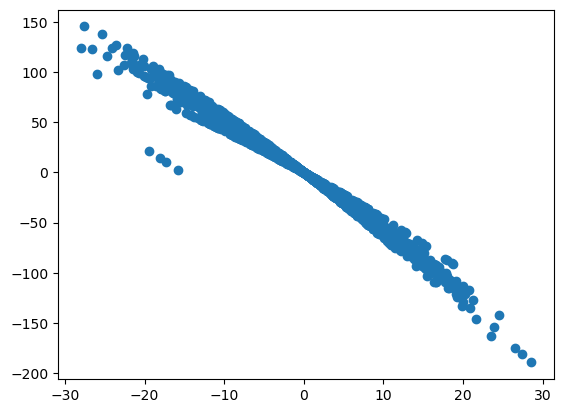

In [14]:
plt.scatter(input_perturbation, output_perturbation)

<Axes: xlabel='LST_perturbation', ylabel='Rn_perturbation'>

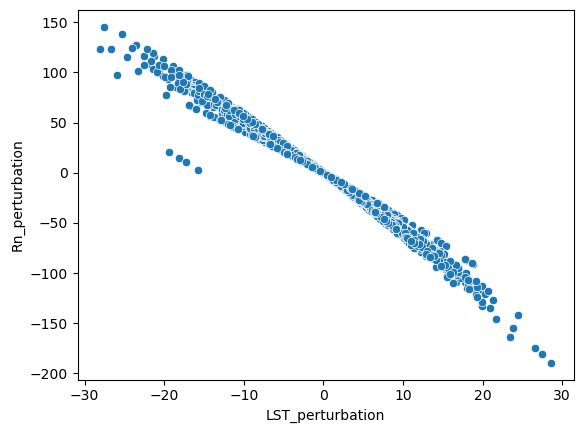

In [15]:
sns.scatterplot(data=results, x=f"{input_variable}_perturbation", y=f"{output_variable}_perturbation")

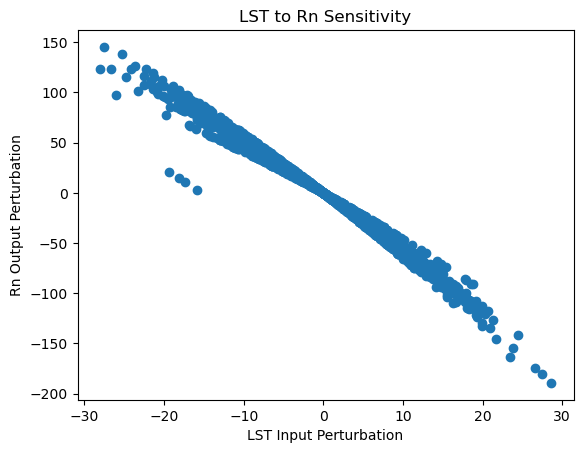

In [16]:
# create figure and axis objects
fig, ax = plt.subplots()

# create scatter plot
ax.scatter(input_perturbation, output_perturbation)

# set title and axis labels
ax.set_title(f"{input_variable} to {output_variable} Sensitivity")
ax.set_xlabel(f"{input_variable} Input Perturbation")
ax.set_ylabel(f"{output_variable} Output Perturbation")

# show plot
plt.show()

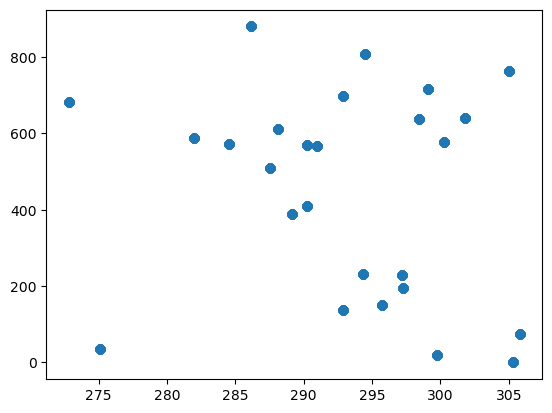

In [17]:
plt.scatter(unperturbed_input, unperturbed_output)